#                            Layoffs Data Analysis using Python

## Nikita Joshi

### Linkedin- https://www.linkedin.com/in/nikita-joshi-0bba471a4/

In [1]:
#numerical python for mathematical functions
import numpy as np

#pandas library
import pandas as pd

#matplotlib library
import matplotlib.pyplot as plt

#seaborn library
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

plt.rcParams['figure.figsize'] = (14, 10) 

In [2]:
df_layoff = pd.read_csv('layoffs.csv')
df_layoff.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Airtable,SF Bay Area,Product,237.0,0.27,2023-09-14,Series F,United States,1400.0
1,R3,New York City,Crypto,NaN,0.20,2023-09-14,Series A,United States,112.0
2,Akili Labs,Boston,Healthcare,NaN,0.40,2023-09-13,Post-IPO,United States,301.0
3,Google,SF Bay Area,Consumer,NaN,NaN,2023-09-13,Post-IPO,United States,26.0
4,Evolve,Denver,Travel,175.0,0.20,2023-09-12,Series F,United States,224.0


#### DATA DICTIONARY

In [3]:
df_layoff.shape   #Number of rows and columns in the dataset

(3022, 9)

In [4]:
df_layoff.info()   #Gives all the features name, null value count and data type of all the features in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3022 non-null   object 
 1   location             3022 non-null   object 
 2   industry             3022 non-null   object 
 3   total_laid_off       2031 non-null   float64
 4   percentage_laid_off  1972 non-null   float64
 5   date                 3022 non-null   object 
 6   stage                3015 non-null   object 
 7   country              3022 non-null   object 
 8   funds_raised         2715 non-null   float64
dtypes: float64(3), object(6)
memory usage: 212.6+ KB


In [5]:
df_layoff.date = pd.to_datetime(df_layoff.date)

In [6]:
df_layoff.dtypes

company                        object
location                       object
industry                       object
total_laid_off                float64
percentage_laid_off           float64
date                   datetime64[ns]
stage                          object
country                        object
funds_raised                  float64
dtype: object

In [7]:
df_layoff.describe(include='all')  #gives 5 point summary of all the features in the dataset

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
count,3022,3022,3022,2031.000000,1972.000000,3022,3015,3022,2715.000000
unique,2304,222,30,NaN,NaN,641,16,63,NaN
top,Uber,SF Bay Area,Finance,NaN,NaN,2020-04-02 00:00:00,Post-IPO,United States,NaN
freq,6,749,373,NaN,NaN,27,589,1940,NaN
first,NaN,NaN,NaN,NaN,NaN,2020-03-11 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2023-09-14 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,244.819793,0.269456,NaN,NaN,NaN,765.518783
std,NaN,NaN,NaN,790.585013,0.270384,NaN,NaN,NaN,5053.804174
min,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,40.000000,0.100000,NaN,NaN,NaN,50.000000


In [8]:
nv_pct = (df_layoff.isnull().sum()/len(df_layoff))*100
print("The percentage of null values in the dataset is as follows:")
print(nv_pct)

The percentage of null values in the dataset is as follows:
company                 0.000000
location                0.000000
industry                0.000000
total_laid_off         32.792852
percentage_laid_off    34.745202
date                    0.000000
stage                   0.231635
country                 0.000000
funds_raised           10.158835
dtype: float64


### UNIVARIATE ANALYSIS OF FEATURES

In [9]:
df_layoff_num = df_layoff.select_dtypes(include=np.number)
df_layoff_cat = df_layoff.select_dtypes(include='object')

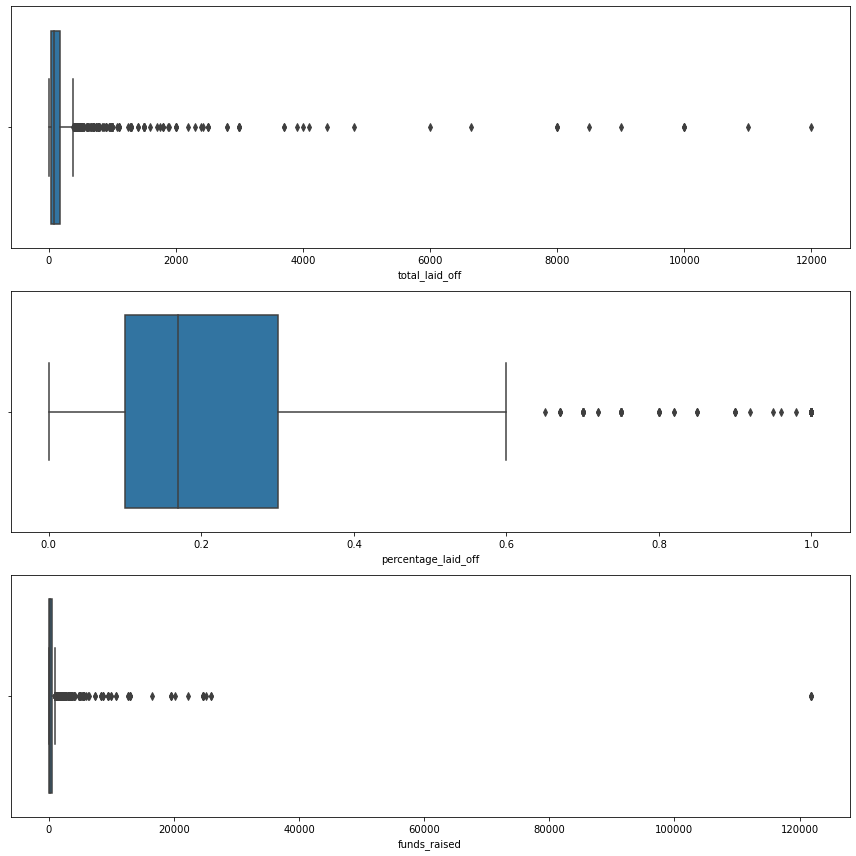

In [10]:
#Plotting a boxplot for all the numerical features
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(12,12))

for col,subplot in zip(df_layoff_num,ax.flatten()):
    sns.boxplot(df_layoff_num[col],ax=subplot)
    
plt.tight_layout()
plt.show()

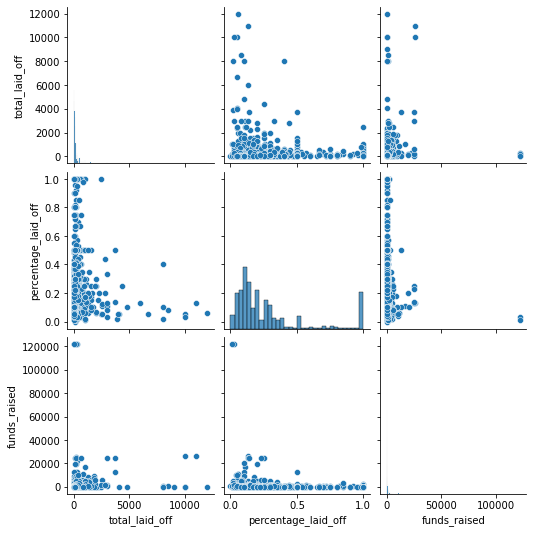

In [11]:
sns.pairplot(df_layoff)

### Feature: total_laid_off

In [12]:
#Using simple imputer from sklearn to fill null values in total_laid_off column
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with median as mean is not appropriate because of extreme values
imputer = SimpleImputer(strategy='median')  

# Fit the imputer to the selected column
imputer.fit(df_layoff_num[['total_laid_off']])

# Transform and replace the missing values in the DataFrame
df_layoff_num[['total_laid_off']] = imputer.transform(df_layoff_num[['total_laid_off']])

In [13]:
df_layoff_num['total_laid_off'].isnull().sum()  #Null values are imputed using SI with median in total_laid_off

0

### Feature: funds_raised

In [14]:
#Using simple imputer from sklearn to fill null values in funds_raised column
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with median as mean is not appropriate because of extreme values
imputer = SimpleImputer(strategy='median')  

# Fit the imputer to the selected column
imputer.fit(df_layoff_num[['funds_raised']])

# Transform and replace the missing values in the DataFrame
df_layoff_num[['funds_raised']] = imputer.transform(df_layoff_num[['funds_raised']])

In [15]:
df_layoff_num['funds_raised'].isnull().sum()  #Null values are imputed using SI with median in funds_raised

0

### Feature:percentage_laid_off

In [16]:
#Using simple imputer from sklearn to fill null values in percentage_laid_off column
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with median as mean is not appropriate because of extreme values
imputer = SimpleImputer(strategy='median')  

# Fit the imputer to the selected column
imputer.fit(df_layoff_num[['percentage_laid_off']])

# Transform and replace the missing values in the DataFrame
df_layoff_num[['percentage_laid_off']] = imputer.transform(df_layoff_num[['percentage_laid_off']])

In [17]:
df_layoff_num['percentage_laid_off'].isnull().sum()  #Null values are imputed using SI with median in percentage_laid_off

0

### Feature:stage

In [18]:
df_layoff_cat.stage.value_counts()

Post-IPO          589
Unknown           504
Series B          371
Series C          365
Series D          274
Acquired          237
Series A          222
Series E          146
Seed               96
Series F           81
Private Equity     53
Series H           28
Series G           18
Subsidiary         15
Series I            8
Series J            8
Name: stage, dtype: int64

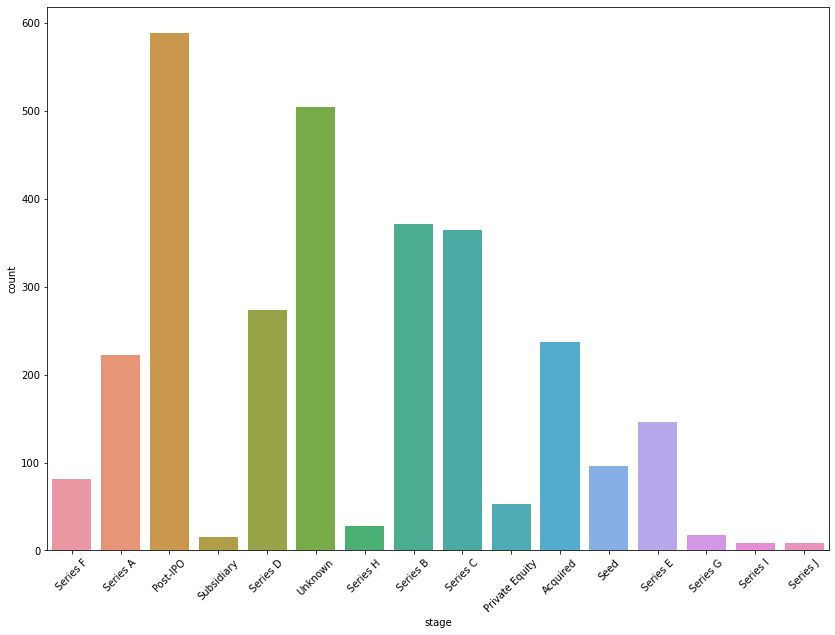

In [19]:
sns.countplot(df_layoff_cat.stage)
plt.xticks(rotation=45)
plt.show()

In [20]:
df_layoff_cat.stage.isnull().sum()

7

In [21]:
#As the null value count is way too less using mode to impute the null value

df_layoff_cat.stage = df_layoff_cat.stage.fillna('mode')

In [22]:
df_layoff_cat.stage.isnull().sum()   #null values imputed

0

-----------------------------------------

In [23]:
df_layoff.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object')

#### Country VS Total laid off

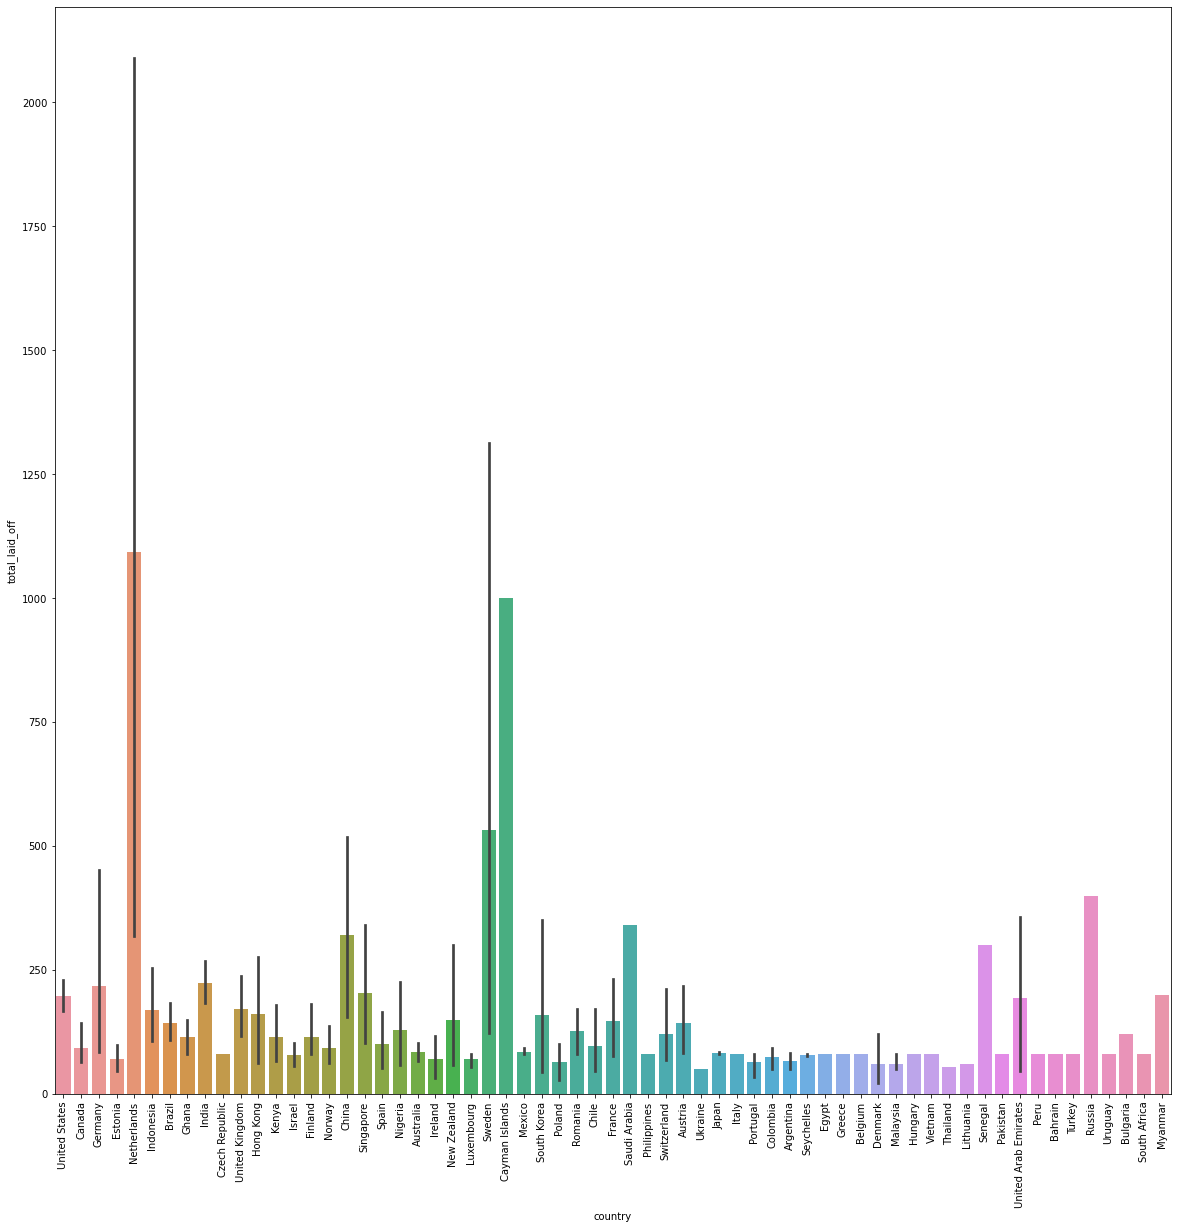

In [24]:
plt.figure(figsize=(20,20))
sns.barplot(df_layoff_cat.country,df_layoff_num['total_laid_off'])
plt.xticks(rotation=90)
plt.show()

In [25]:
df_layoff_cat.industry.nunique()

30

### Industry VS Total laid off

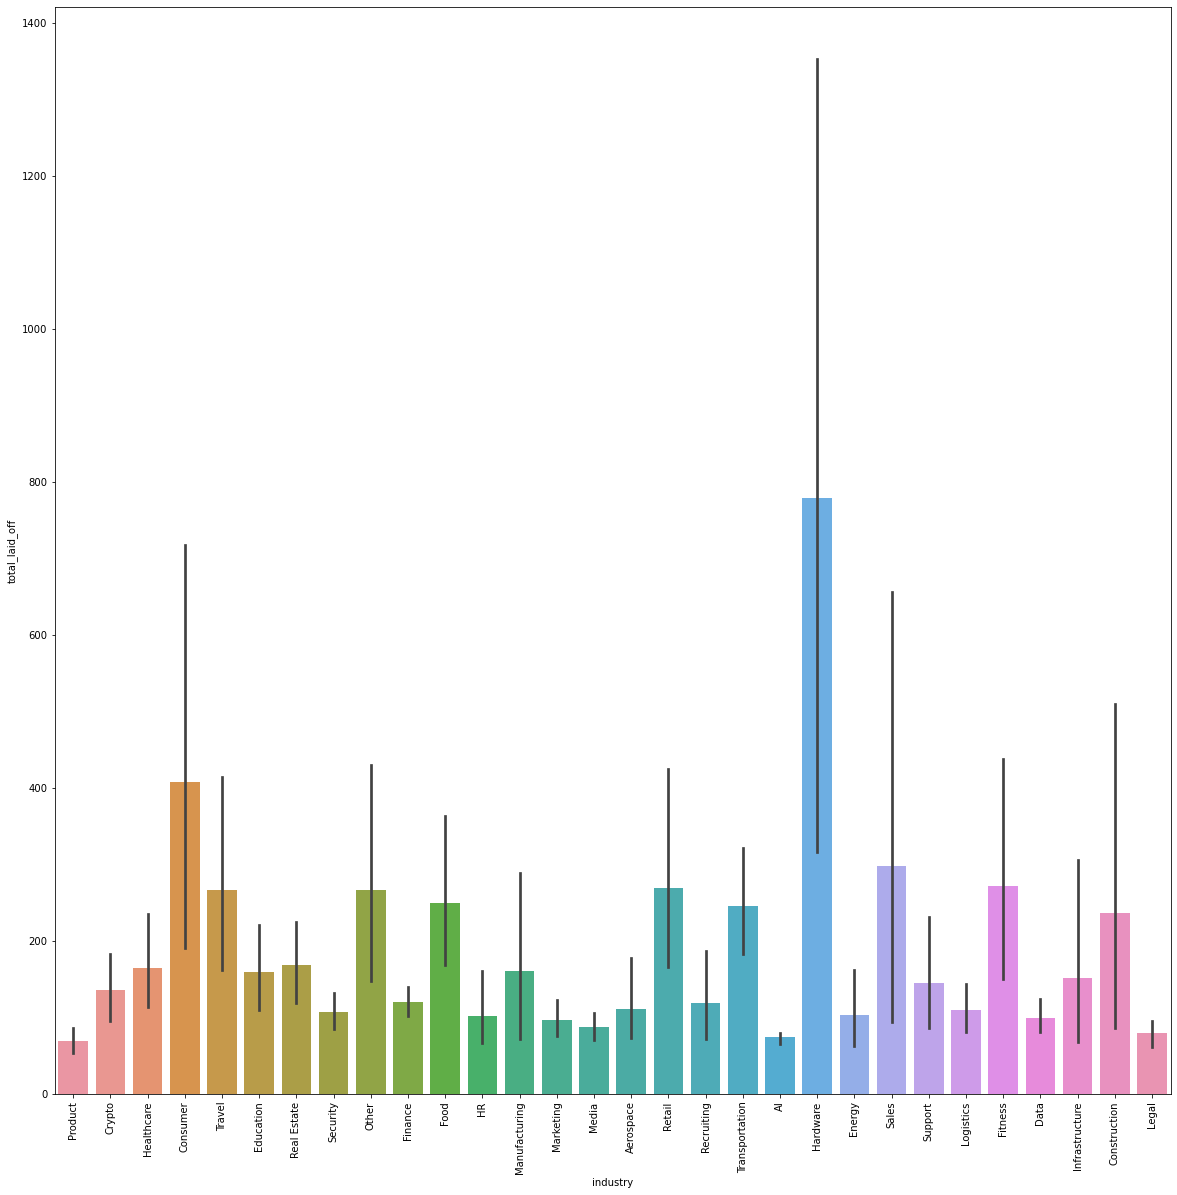

In [26]:
plt.figure(figsize=(20,20))
sns.barplot(df_layoff_cat.industry,df_layoff_num['total_laid_off'])
plt.xticks(rotation=90)
plt.show()

In [48]:
#Combining numerical and categorical df's with no null values

df_layoff_corrected = pd.concat([df_layoff_num,df_layoff_cat],axis=1,join='outer',ignore_index=False)
df_layoff_corrected.head()

,total_laid_off,percentage_laid_off,funds_raised,company,location,industry,stage,country
0,237.0,0.27,1400.0,Airtable,SF Bay Area,Product,Series F,United States
1,80.0,0.20,112.0,R3,New York City,Crypto,Series A,United States
2,80.0,0.40,301.0,Akili Labs,Boston,Healthcare,Post-IPO,United States
3,80.0,0.17,26.0,Google,SF Bay Area,Consumer,Post-IPO,United States
4,175.0,0.20,224.0,Evolve,Denver,Travel,Series F,United States


In [54]:
#Date column is not included in this combined dataframe as it has dtype as datetime and any which ways date column doesn't help us much toi infer about total lay offs.

### Stage VS Total laid off

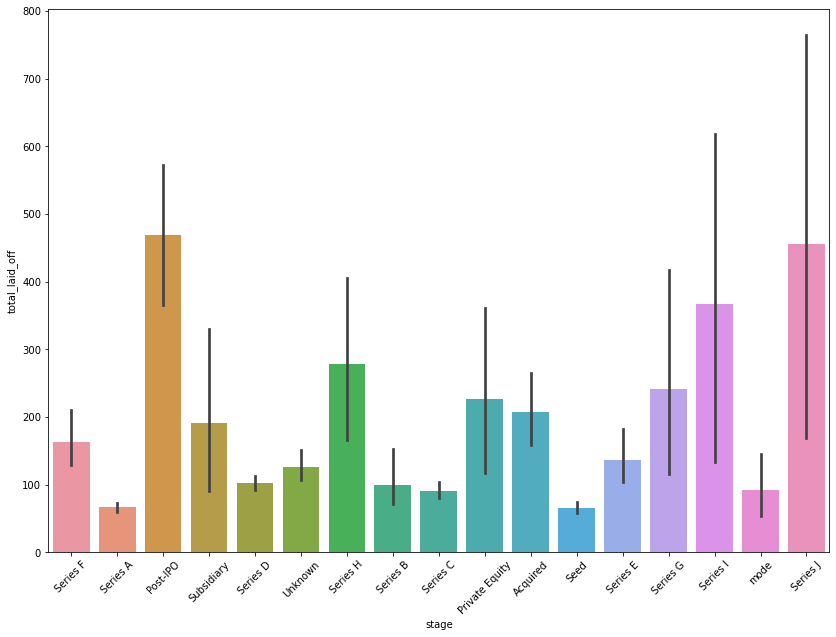

In [33]:
sns.barplot(data=df_layoff_corrected,x='stage',y='total_laid_off')
plt.xticks(rotation=45)
plt.show()

### Company VS Total laid off

In [42]:
df_layoff_corrected.company.nunique()  #nunique help to identify the unique country count in the dataframe

2304

In [39]:
max_layoffs_country = df_layoff_corrected.loc[df_layoff_corrected['total_laid_off'].idxmax()]  
max_layoffs_country
#The idxmax() function in pandas is used to find the index of the maximum value

total_laid_off               12000.0
percentage_laid_off             0.06
funds_raised                    26.0
company                       Google
location                 SF Bay Area
industry                    Consumer
stage                       Post-IPO
country                United States
Name: 930, dtype: object

In [36]:
df_layoff_corrected[df_layoff_corrected['total_laid_off'] == 12000.0]  
#Getting the name of the company where total_laid_off is max

,total_laid_off,percentage_laid_off,funds_raised,company,location,industry,stage,country
930,12000.0,0.06,26.0,Google,SF Bay Area,Consumer,Post-IPO,United States


In [40]:
min_layoffs_country = df_layoff_corrected.loc[df_layoff_corrected['total_laid_off'].idxmin()]
min_layoffs_country
#The idxmin() function in pandas is used to find the index of the minimum value

total_laid_off                   3.0
percentage_laid_off             0.27
funds_raised                     2.0
company                       Branch
location               New York City
industry                      Retail
stage                           Seed
country                United States
Name: 2501, dtype: object

In [41]:
df_layoff_corrected[df_layoff_corrected['total_laid_off'] == 3.0]  
#Getting the name of the company where total_laid_off is min

,total_laid_off,percentage_laid_off,funds_raised,company,location,industry,stage,country
2501,3.0,0.27,2.0,Branch,New York City,Retail,Seed,United States


### Funds Raised VS Total laid off

In [55]:
df_layoff_corrected.funds_raised.nunique()

690

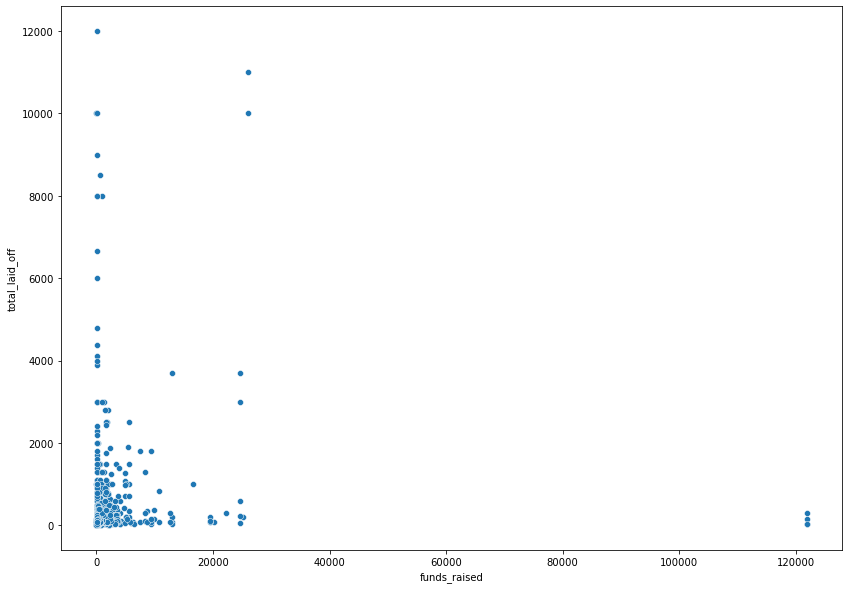

In [58]:
sns.scatterplot(data=df_layoff_corrected,x='funds_raised',y='total_laid_off')
plt.show()

### Correlation plot

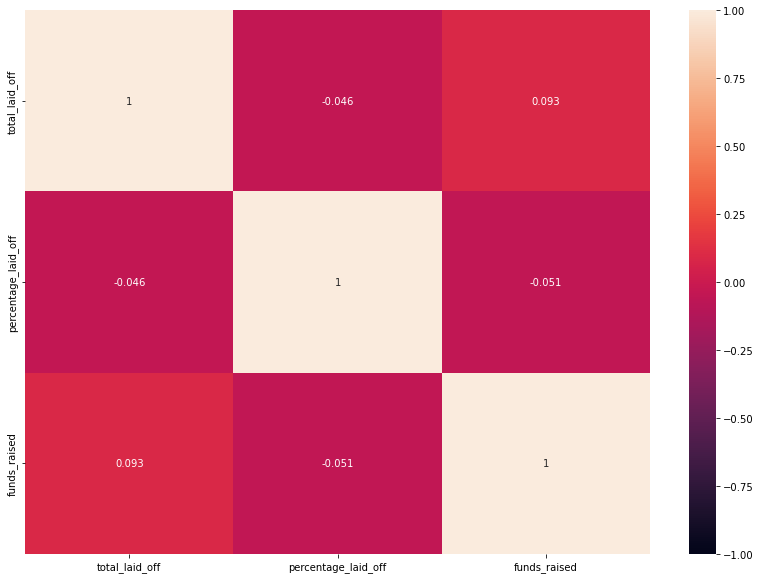

In [57]:
sns.heatmap(df_layoff_corrected.corr(),vmin=-1.0,vmax=+1.0,annot=True)
plt.show()

### INSIGHTS FROM THE DATA